In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
from sklearn.svm import SVC
%matplotlib inline

In [33]:
test_df = pd.read_csv('titanic_test.csv')
train_df = pd.read_csv('titanic_train.csv')

In [34]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [35]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [36]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

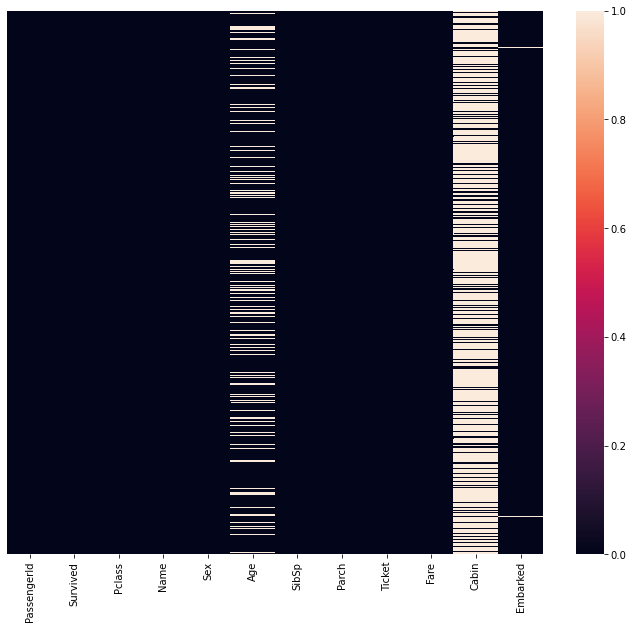

In [37]:
plt.figure(figsize=(12,10))
sns.heatmap(train_df.isnull(),yticklabels = False)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

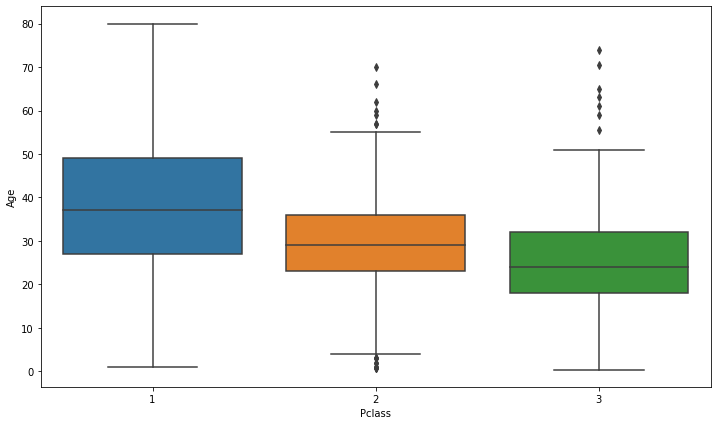

In [38]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train_df)


In [39]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [40]:
train_df['Age'] = train_df[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

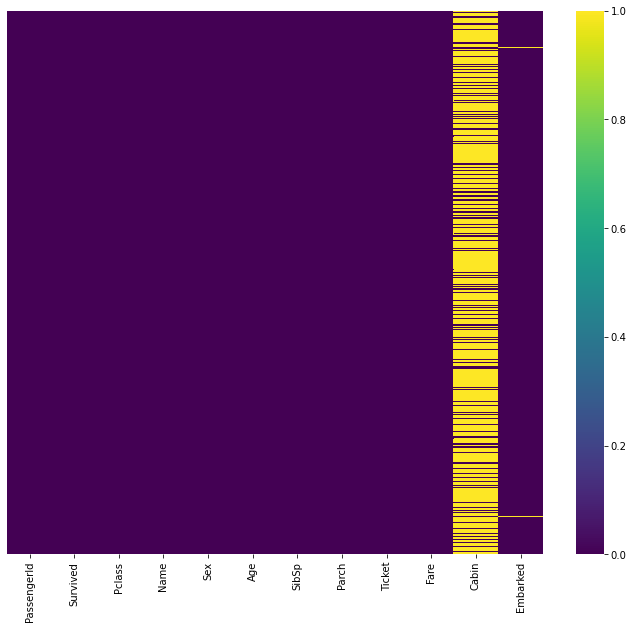

In [41]:
plt.figure(figsize=(12,10))
sns.heatmap(train_df.isnull(),yticklabels = False,cmap='viridis')

In [42]:
train_df.drop(['Cabin','Embarked'],axis = 1, inplace = True)

In [43]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000


In [44]:
### train_df['Name']= pd.to_numeric(train_df['Name'],errors='coerce')
train_df['Sex'] = pd.get_dummies(train_df['Sex'],drop_first=True)

In [45]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,24.0,1,2,W./C. 6607,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000


In [46]:
train_df.drop(['Parch','SibSp','Ticket','Fare','Name'],axis=1)

,PassengerId,Survived,Pclass,Sex,Age
0,1,0,3,1,22.0
1,2,1,1,0,38.0
2,3,1,3,0,26.0
3,4,1,1,0,35.0
4,5,0,3,1,35.0
...,...,...,...,...,...
886,887,0,2,1,27.0
887,888,1,1,0,19.0
888,889,0,3,0,24.0
889,890,1,1,1,26.0


In [47]:
X = train_df[['PassengerId','Pclass','Sex','Age']]
y = train_df['Survived']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train)
len(X_test)

179

In [49]:
model10=LogisticRegression()
model10.fit(X_train,y_train)
y_pred = model10.predict(X_test)
acc = accuracy_score(y_test,y_pred)
acc

0.8044692737430168

In [50]:
model11 = GaussianNB()
model11.fit(X_train,y_train)
y_pred = model11.predict(X_test)
acc = accuracy_score(y_test,y_pred)
acc

0.7486033519553073

In [51]:
model22 = SVC()
model22.fit(X_train,y_train)
y_pred = model22.predict(X_test)
acc = accuracy_score(y_test,y_pred)
acc

0.5865921787709497

In [52]:
model33 = DecisionTreeClassifier()
model33.fit(X_train,y_train)
y_pred = model33.predict(X_test)
acc = accuracy_score(y_test,y_pred)
acc

0.7206703910614525

In [53]:
model33 = DecisionTreeClassifier()
model33.fit(X_train,y_train)
y_pred = model33.predict(X_test)
acc = accuracy_score(y_test,y_pred)
acc

0.7039106145251397

In [54]:
model44 = KNeighborsClassifier()
model44.fit(X_train,y_train)
y_pred = model44.predict(X_test)
acc = accuracy_score(y_test,y_pred)
acc

0.5307262569832403